# Hypothesis

In Comp 110, There are more people completed AP Computer Science Principles than AP Computer Science A.

### The Following is to automatically reload the imported modules.

In [1]:
%reload_ext autoreload
%autoreload 2

### First, I will read in the CSV Rows and turn a row-oriented data table into a column-oriented table.

In [2]:
from data_utils import read_csv_rows, columnar
from tabulate import tabulate

data_rows: list[dict[str, str]] = read_csv_rows('../../data/survey.csv')
columns: dict[str, list[str]] = columnar(data_rows)

### Next, I will display the first 15 students' completion status for AP CompSci A & AP CompSci Principles. ('' is equivalent to "No" for this survey question)

Disclaimer, some survey responses have blank spots (gaps in the table).

In [3]:
from data_utils import head, select

updated_table: dict[str, list[str]] = select(columns, ["AP_A", "AP_Principles"])
tabulate(head(updated_table, 15), updated_table.keys(), "html")

AP_A,AP_Principles
,
,
,
,
,
Yes,Yes
,
,
,
,


### Next, I will track and count the number of students who completed APCS A & APCS Principles (or didn't) and display the results.

In [4]:
from data_utils import count
from helpers import percentage

completed_cs_a: dict[str, int] = count(updated_table["AP_A"])
completed_cs_p: dict[str, int] = count(updated_table["AP_Principles"])

# Removes blank '' responses
completed_cs_a.pop('')
completed_cs_p.pop('')

print(f"Completed APCS A: {completed_cs_a}")
print(f"Completed APCS Principles: {completed_cs_p}")

Completed APCS A: {'Yes': 35, 'No': 135}
Completed APCS Principles: {'Yes': 46, 'No': 124}


### Lastly, I will calculate the percentage of 'Yes' responses out of the total for each class.
### The results are also displayed with a bar graph.


Percentage of 'Yes' responses for APCS A: 20.59%
Percentage of 'Yes' responses for APCS P: 27.06%


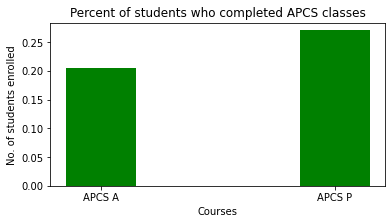

In [5]:
import numpy as np
import matplotlib.pyplot as plt

perc_ap_a: float = percentage(completed_cs_a, "Yes")
perc_ap_p: float = percentage(completed_cs_p, "Yes")

print(f"\nPercentage of 'Yes' responses for APCS A: {100 * perc_ap_a:.2f}%")
print(f"Percentage of 'Yes' responses for APCS P: {100 * perc_ap_p:.2f}%")

# Dataset generation
data_dict = {'APCS A':perc_ap_a, 'APCS P':perc_ap_p}
courses = list(data_dict.keys())
values = list(data_dict.values())
fig = plt.figure(figsize = (6, 3))

# Bar graph
plt.bar(courses, values, color ='green',
        width = 0.3)
plt.xlabel("Courses")
plt.ylabel("No. of students enrolled")
plt.title("Percent of students who completed APCS classes")
plt.show()

# Conclusion

After some work, we can see that my hypothesis was correct. Personally, I took both APCS-A and APCS Principles in high school. I'm currently a first-year at UNC, so this was what I assumed would be the case. I made this hypothesis for a few reasons. Firstly, APCS-A is (arguably) more difficult than APCS Principles, so people may not have WANTED to take it--or even failed/dropped it somehow. Secondly, APCS Principles is a prerequisite for APCS-A; therefore, some people may not have had the time to take it in high school (it may also could not have been offered for them). Lastly, the AP exam for APCS-A gives the student the opportunity to get credit for Comp 110 if they score a 5. This means that there may have been a select few that didn't have to take Comp 110 for their CS path.